In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

## 1. Data Loading and Initial Exploration:
- Load the dataset into a pandas DataFrame.
- Explore the first few rows to understand the structure of the data.
- Check the data types, summary statistics, and unique values of each column.
- Identify any obvious data quality issues or inconsistencies.
  

In [2]:
df = pd.read_csv('./SuperStore_Dataset.csv')
df.shape

(10014, 21)

In [3]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales Price      float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

- the datatypes of most attributes need to be changed to their respective types

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales Price', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.rename(columns={
    'Row ID':'row_id',
    'Order ID':'order_id', 
    'Order Date':'order_date', 
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'Segment':'segment',
    'Country':'country',
    'City':'city', 
    'State':'state',
    'Postal Code':'postal_code',
    'Region':'region',
    'Product ID':'product_id', 
    'Category':'category',
    'Sub-Category':'sub_category',
    'Product Name':'product_name',
    'Sales Price':'sales_price',
    'Quantity':'quantity',
    'Discount':'discount',
    'Profit':'profit'
}, inplace=True)

In [6]:
df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode        98
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code       0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales_price       0
quantity         18
discount          0
profit            0
dtype: int64

In [7]:
df.describe()

,row_id,postal_code,sales_price,quantity,discount,profit
count,10014.000000,10014.000000,10014.000000,9996.000000,10014.000000,10014.000000
mean,4997.523367,55205.131616,230.038424,3.792517,0.156240,28.708317
std,2888.981754,32066.711027,623.057359,2.231021,0.206392,234.154272
min,1.000000,1040.000000,-31.500000,1.000000,0.000000,-6599.978000
25%,2494.250000,23223.000000,17.280000,2.000000,0.000000,1.731375
50%,4997.500000,57103.000000,54.780000,3.000000,0.200000,8.666500
75%,7500.750000,90008.000000,209.970000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


- seems like there are negative sales prices

In [8]:
df.head(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
5,6,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694
6,7,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4.0,0.00,1.9656
7,8,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6.0,0.20,90.7152
8,9,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3.0,0.20,5.7825
9,10,CA-2014-115812,09/06/14,2014-6-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0,0.00,34.4700


In [9]:
df.tail(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
10004,1043,CA-2016-102981,06/09/16,09/09/16,Second Class,MO-17500,Mary O'Rourke,Consumer,United States,New York City,New York,10035,East,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",722.352,3.0,0.2,90.2940
10005,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5.0,0.2,2.9835
10006,1045,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AP-10000055,Office Supplies,Appliances,Belkin F9S820V06 8 Outlet Surge,58.464,9.0,0.8,-146.1600
10007,1046,CA-2017-152702,12/10/17,16/10/17,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Rockford,Illinois,61107,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",254.604,14.0,0.3,-18.1860
10008,1047,CA-2016-169103,08/03/16,13/03/16,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Miami,Florida,33142,South,TEC-PH-10001530,Technology,Phones,Cisco Unified IP Phone 7945G VoIP phone,1363.960,5.0,0.2,85.2475
10009,1048,CA-2016-169103,08/03/16,13/03/16,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Miami,Florida,33142,South,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.360,3.0,0.2,-3.8385
10010,9613,CA-2016-110086,18/09/16,22/09/16,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Woodland,California,95695,West,TEC-PH-10001299,Technology,Phones,Polycom CX300 Desktop Phone USB VoIP phone,239.984,2.0,0.2,23.9984
10011,9614,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.980,1.0,0.0,6.8940
10012,9615,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,102.130,7.0,0.0,15.3195
10013,9616,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.584,2.0,0.2,762.5940


- something's wrong with the row_id column

## 2. Handling Duplicates

In [10]:
duplicate_rows_mask = df.duplicated()
df.loc[duplicate_rows_mask]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
9994,9980,US-2016-103674,06/12/16,10/12/16,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14.0,0.2,153.1152
9995,9981,US-2015-151435,06/09/15,09/09/15,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1.0,0.0,22.3548
9996,18,CA-2014-167164,13/05/14,2014-5-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.500,2.0,0.0,9.9900
9997,19,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.560,2.0,0.0,2.4824
9999,21,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4.0,0.2,7.3840
10001,8853,CA-2014-119977,08/10/14,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,New York,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4.0,0.0,55.7640
10002,8854,US-2015-115343,22/09/15,25/09/15,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,5.0,0.2,6.2550
10003,8855,US-2015-115343,22/09/15,25/09/15,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,Pennsylvania,19143,East,TEC-AC-10003832,Technology,Accessories,Logitech�P710e Mobile Speakerphone,617.976,3.0,0.2,-7.7247
10004,1043,CA-2016-102981,06/09/16,09/09/16,Second Class,MO-17500,Mary O'Rourke,Consumer,United States,New York City,New York,10035,East,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",722.352,3.0,0.2,90.2940
10006,1045,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AP-10000055,Office Supplies,Appliances,Belkin F9S820V06 8 Outlet Surge,58.464,9.0,0.8,-146.1600


In [11]:
duplicate_rowIDs_mask = df.duplicated(['row_id'])
print(f'Number of duplicate (entire) rows are - {len( df.loc[duplicate_rows_mask] )}')
print(f'Number of rows with duplicate row_id attribute are - {len( df.loc[duplicate_rowIDs_mask] )}')

Number of duplicate (entire) rows are - 17
Number of rows with duplicate row_id attribute are - 20


- There are **3 rows** with duplicate `row_id` attribute
- So, let's check the differences in duplicated rows by:
  - <ins>keeping first rows</ins> and marking the last as duplicates
  - and then <ins>keeping last rows</ins> and marking the first as the rows with duplicate row_ids.

In [12]:
df.loc[ duplicate_rowIDs_mask & ~duplicate_rows_mask ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
9998,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3.0,0.2,16.0110
10000,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,-9.392,2.0,0.2,3.2872
10005,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5.0,0.2,2.9835


In [13]:
duplicate_rows_mask2 = df.duplicated(keep='last')
duplicate_rowIDs_mask2 = df.duplicated(['row_id'], keep='last')
df.loc[ duplicate_rowIDs_mask2 & ~duplicate_rows_mask2 ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
19,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,NaN,0.2,16.0110
1043,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",8.840,5.0,0.2,2.9835
8851,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,9.392,2.0,0.2,3.2872


- Row 9998 and 19 are the same with the differences in `quantity` column. row-19 contains the quatity as NaN while 9998 has a defined quantity. Therefore keeping row 9998.
- Rows '10000 & 8851' and '10005 & 1043' are same except they have a sign's difference in the `sales_price` column(1043 and 8851 have -ve sales_price).

- do other rows with -ve `sales_price` exist?
  -     if yes, then does that indicate a sale in loss or a return/refund?
- do -ve `profit`s also exist?

In [14]:
neg_sales_prices = df.loc[ df['sales_price'] < 0 ]
neg_sales_prices

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
9794,9795,CA-2014-127166,21/05/14,2014-5-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,TX,77070,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,-18.240,3.0,0.8,-31.0080
9984,9985,CA-2015-100251,17/05/15,23/05/15,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,NY,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,-31.500,10.0,0.0,15.1200
10000,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,-9.392,2.0,0.2,3.2872
10005,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5.0,0.2,2.9835


- so there are two more rows with negative sales_price
- out of the 4 rows with negative sales price, only 1 has a negative profit

In [15]:
# confirming if -ve profits are a result of -ve sales_price
df.loc[ df['profit'] < 0 ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
14,15,US-2015-118983,22/11/15,26/11/15,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.80,-123.8580
15,16,US-2015-118983,22/11/15,26/11/15,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,NaN,0.80,-3.8160
23,24,US-2017-156909,16/07/17,18/07/17,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196
27,28,US-2015-150630,17/09/15,21/09/15,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,19/03/15,22/03/15,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704
10003,8855,US-2015-115343,22/09/15,25/09/15,First Class,FO-14305,Frank Olsen,Consumer,United States,Philadelphia,Pennsylvania,19143,East,TEC-AC-10003832,Technology,Accessories,Logitech�P710e Mobile Speakerphone,617.9760,3.0,0.20,-7.7247
10006,1045,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AP-10000055,Office Supplies,Appliances,Belkin F9S820V06 8 Outlet Surge,58.4640,9.0,0.80,-146.1600
10007,1046,CA-2017-152702,12/10/17,16/10/17,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Rockford,Illinois,61107,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",254.6040,14.0,0.30,-18.1860


- More than 1800 rows with -ve profit, i.e. loss. But the sale prices in these 1800 rows are +ve.
- Thus, a -ve sales_price does not indicate a sale in loss (-ve profit)
- Neither do the 4 rows with -ve sale prices indicate a return/refund as:
    - these are very less compared to the almost 10000 records in the dataset
    - out of the 4 -ve sale prices, 2 recored are duplicates. so the remaining 2 are mostlikely to be incorrect data entries
- The 4 rows with -ve sales are just accidental wrong data entries

In [16]:
df['sales_price'] = np.abs(df['sales_price'])

In [17]:
neg_sales_prices = df.loc[ df['sales_price'] < 0 ]
neg_sales_prices

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit


No. of rows affected = 4

In [18]:
df.shape

(10014, 21)

In [19]:
labels_to_drop = list(df.loc[duplicate_rowIDs_mask2].index)
df.drop(labels_to_drop, axis='index', inplace=True)
df.shape

(9994, 21)

- Dropping the row_id column as its need is sufficed
- The dataframe index maintains a unique row number for each row same as row_id column

In [20]:
df.drop(['row_id'], axis='columns', inplace=True)

In [21]:
# do duplicate rows still exist?
duplicate_rows_mask = df.duplicated()
df[duplicate_rows_mask]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
3406,US-2014-150119,23/04/14,2014-4-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2.0,0.3,-12.0588


In [22]:
df.drop(df[duplicate_rows_mask].index, axis='index', inplace=True)
df.shape

(9993, 20)

In [23]:
# , 'quantity', 'discount', 'profit'
labels = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'product_id', 'product_name', 'category', 'sub_category', 'discount']
duplicate_orderID_rows = df.duplicated(labels)
print(len(df.loc[duplicate_orderID_rows]))
df.loc[duplicate_orderID_rows]

7


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
352,CA-2016-129714,01/09/16,03/09/16,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4.0,0.0,23.0864
431,US-2016-123750,15/04/16,21/04/16,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation�Secure+ Hardware Encrypted USB 2.0�Fla...,291.960,5.0,0.2,54.7425
1301,CA-2016-137043,23/12/16,25/12/16,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380,3.0,0.0,83.0502
3184,CA-2017-152912,09/11/17,12/11/17,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,544.380,3.0,0.0,157.8702
6500,CA-2015-103135,24/07/15,28/07/15,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",90.060,6.0,0.0,41.4276
7882,CA-2017-118017,03/12/17,06/12/17,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,102.336,8.0,0.2,14.0712
9169,CA-2016-140571,15/03/16,19/03/16,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,45.680,2.0,0.0,21.0128


In [24]:
duplicate_orderID_rows2 = df.duplicated(labels, keep='last')
print(len(df.loc[duplicate_orderID_rows2]))
df.loc[duplicate_orderID_rows2]

7


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
350,CA-2016-129714,01/09/16,03/09/16,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2.0,0.0,11.5432
430,US-2016-123750,15/04/16,21/04/16,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052,South,TEC-AC-10004659,Technology,Accessories,Imation�Secure+ Hardware Encrypted USB 2.0�Fla...,408.744,7.0,0.2,76.6395
1300,CA-2016-137043,23/12/16,25/12/16,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,Virginia,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.760,6.0,0.0,166.1004
3183,CA-2017-152912,09/11/17,12/11/17,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,1633.140,9.0,0.0,473.6106
6498,CA-2015-103135,24/07/15,28/07/15,Standard Class,SS-20515,Shirley Schmidt,Home Office,United States,Louisville,Kentucky,40214,South,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",135.090,9.0,0.0,62.1414
7881,CA-2017-118017,03/12/17,06/12/17,Second Class,LC-16870,Lena Cacioppo,Consumer,United States,Thornton,Colorado,80229,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,76.752,6.0,0.2,10.5534
9168,CA-2016-140571,15/03/16,19/03/16,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Jackson,Mississippi,39212,South,OFF-PA-10001954,Office Supplies,Paper,Xerox 1964,319.760,14.0,0.0,147.0896


- there are 7 pairs of records where a pair has all the same columns like 'order_id', 'customer_id', 'product_id', 'ship_date', 'ship_mode', 'postal_code'... but different `sales_price`, `quantity` and `profit`
- Cannot drop these 7 duplicate rows due to insufficient evidence of them being "real" duplicates

### End: Handling Duplicates
- there are 17 rows where all attributes are duplicated
- and 20 rows with duplicate `row_id`(s)
- of the **3 rows with duplicate `row_id`'s**, 1 had a missing `quantity` while other 2 had a sign's difference in the `sales_price`.
- the -ve sign in the 'sales_price' column appears to be a mistake wherever it may have occured (4 rows)
  - the above two points prove the point that the **3 rows with duplicate row_id's** are "real" duplicates too.
- thus, dropped the 20 rows with duplicate row_id
- changed the -ve sign wherever it occurs in the 'sales_price' attribute
- dropped the `row_id` column. the index suffices its need
- there existed one more duplicate row after all that. Dropped that too
- <mark>**In total**, there existed **21** duplicate records</mark>

resetting the index because the index is not contiuous due to dropping of duplicate rows

In [25]:
df.reset_index(drop=True, inplace=True)

## 3. Date Handling
- Normalize the Order Date and Ship Date columns to ensure consistent date formats. Ensure that the format of the date is consistent across all rows
- Extract the year from the Order ID and compare it with the year in the Order Date. Correct any inconsistencies
- Document the number of rows and distinct Order IDs affected by these operations

In [26]:
df['order_date'].unique()[0:100]

array(['08/11/16', '12/06/16', '11/10/15', '09/06/14', '15/04/17',
       '05/12/16', '22/11/15', '11/11/14', '09/12/16', '16/07/17',
       '25/09/15', '16/01/16', '17/09/15', '19/10/17', '08/12/16',
       '27/12/15', '10/09/17', '17/07/16', '19/09/17', '11/03/16',
       '20/10/14', '20/06/16', '18/04/15', '11/12/16', '17/06/16',
       '24/11/17', '30/04/15', '05/12/14', '04/06/16', '18/09/16',
       '14/09/17', '26/04/15', '09/12/17', '26/11/14', '12/10/14',
       '03/09/15', '13/11/17', '28/05/17', '26/10/17', '05/04/16',
       '17/09/16', '31/01/15', '06/11/17', '09/11/17', '17/06/17',
       '06/09/16', '29/08/16', '01/12/16', '13/11/15', '23/11/17',
       '15/10/15', '25/12/17', '03/11/16', '25/08/14', '02/03/15',
       '05/04/15', '26/12/14', '20/09/14', '05/11/17', '06/11/16',
       '02/02/17', '13/10/16', '05/09/16', '18/09/17', '22/12/17',
       '07/09/15', '22/10/14', '13/03/16', '31/05/15', '28/05/15',
       '01/03/14', '20/11/16', '11/05/16', '28/12/15', '16/11/

In [27]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%y')
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date                object
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales_price             float64
quantity                float64
discount                float64
profit                  float64
dtype: object

**total \# rows with changed `order_date`  = 9993 (all)**

In [28]:
df['ship_date'].unique()[0:100]

array(['11/11/16', '16/06/16', '18/10/15', '2014-6-14', '20/04/17',
       '10/12/16', '26/11/15', '2014-11-18', '13/12/16', '18/07/17',
       '30/09/15', '20/01/16', '21/09/15', '23/10/17', '31/12/15',
       '15/09/17', '22/07/16', '23/09/17', '13/03/16', '2014-10-25',
       '25/06/16', '22/04/15', '17/12/16', '18/06/16', '30/11/15',
       '05/05/15', '2014-12-10', '06/06/16', '23/09/16', '17/09/17',
       '02/05/15', '11/12/17', '2014-12-1', '15/06/16', '2014-10-16',
       '08/09/15', '16/11/17', '30/05/17', '02/11/17', '10/04/16',
       '22/09/16', '05/02/15', '12/11/17', '11/11/17', '20/06/17',
       '11/09/16', '02/09/16', '04/12/16', '17/11/15', '28/11/17',
       '20/10/15', '30/12/17', '10/11/16', '2014-8-27', '06/03/15',
       '10/04/15', '2014-12-28', '2014-9-25', '05/02/17', '19/10/16',
       '07/09/16', '27/12/17', '12/09/15', '2014-10-28', '09/12/16',
       '16/03/16', '02/06/15', '03/06/15', '2014-3-6', '24/11/16',
       '12/05/16', '20/11/16', '2014-9-12', '2

In [29]:
# handling ship dates of type - dd/mm/yy
dt_type1_mask = df['ship_date'].str.contains(r'\d{2}[/]\d{2}[/]\d{2}', regex=True, na=False)
df.loc[ dt_type1_mask, 'ship_date' ]

0       11/11/16
1       11/11/16
2       16/06/16
3       18/10/15
4       18/10/15
          ...   
9985    12/07/17
9986    16/10/17
9987    13/03/16
9988    13/03/16
9989    22/09/16
Name: ship_date, Length: 8054, dtype: object

In [30]:
df.loc[dt_type1_mask, 'ship_date'] = pd.to_datetime(df.loc[dt_type1_mask, 'ship_date'], format='%d/%m/%y')
df.loc[ dt_type1_mask, 'ship_date' ]

0       2016-11-11 00:00:00
1       2016-11-11 00:00:00
2       2016-06-16 00:00:00
3       2015-10-18 00:00:00
4       2015-10-18 00:00:00
               ...         
9985    2017-07-12 00:00:00
9986    2017-10-16 00:00:00
9987    2016-03-13 00:00:00
9988    2016-03-13 00:00:00
9989    2016-09-22 00:00:00
Name: ship_date, Length: 8054, dtype: object

\# rows with changed `ship_date`  = 8054

In [31]:
# handling dates of type - yyyy-mm-dd
dt_type2_mask = df['ship_date'].str.contains(r'\d{4}[-]\d{1,2}[-]\d{1,2}', regex=True, na=False)
df.loc[ dt_type2_mask, 'ship_date' ]

5        2014-6-14
6        2014-6-14
7        2014-6-14
8        2014-6-14
9        2014-6-14
           ...    
9978      2014-9-1
9980    2014-10-13
9990    2014-11-13
9991    2014-11-13
9992    2014-11-13
Name: ship_date, Length: 1939, dtype: object

In [32]:
df.loc[dt_type2_mask, 'ship_date'] = pd.to_datetime(df.loc[dt_type2_mask, 'ship_date'], format='%Y-%m-%d')
df.loc[ dt_type2_mask, 'ship_date' ]

5       2014-06-14 00:00:00
6       2014-06-14 00:00:00
7       2014-06-14 00:00:00
8       2014-06-14 00:00:00
9       2014-06-14 00:00:00
               ...         
9978    2014-09-01 00:00:00
9980    2014-10-13 00:00:00
9990    2014-11-13 00:00:00
9991    2014-11-13 00:00:00
9992    2014-11-13 00:00:00
Name: ship_date, Length: 1939, dtype: object

\# rows with changed `ship_date`  = 1939  
**total \# rows with changed `ship_date`**  = (8054+1939) = **9993** (all)

In [33]:
df = df.astype({'ship_date':'datetime64[ns]'})
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales_price             float64
quantity                float64
discount                float64
profit                  float64
dtype: object

no data lost in typecasting dates!!

#### check whether or not the years in `order_date` and `order_id` match

In [34]:
# order_id -> xx-YYYY-xxxxxx
order_id_yrs = df['order_id'].str.extract(r'-(\d{2,4})-', expand=False).astype('int')
order_date_yrs = df['order_date'].dt.year
inconsistent_order_dates_mask = (order_id_yrs != order_date_yrs)

inconsistent_order_dates = df[inconsistent_order_dates_mask]
print(f'# records with inconsistent order dates are - {len(inconsistent_order_dates)}')
inconsistent_order_dates

# records with inconsistent order dates are - 40


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
58,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,TEC-AC-10004633,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2.0,0.0,6.1512
59,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6.0,0.2,9.3612
60,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10003892,Office Supplies,Paper,Xerox 1943,146.730,3.0,0.0,68.9631
61,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,FUR-FU-10000397,Furniture,Furnishings,Luxo Economy Swing Arm Lamp,79.760,4.0,0.0,22.3328
939,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-PA-10004101,Office Supplies,Paper,Xerox 1894,32.400,5.0,0.0,15.5520
940,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-ST-10001496,Office Supplies,Storage,Standard Rollaway File with Lock,540.570,3.0,0.0,140.5482
941,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-BI-10002931,Office Supplies,Binders,"Avery Trapezoid Extra Heavy Duty 4"" Binders",167.760,5.0,0.2,62.9100
1142,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380
1143,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217
2742,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,California,94122,West,OFF-AR-10003251,Office Supplies,Art,Prang Drawing Pencil Set,5.560,2.0,0.0,2.2240


#### replacing the years in `order_date` with years in `order_id`

In [35]:
inconsistent_order_dates.shape

(40, 20)

Thus, there are a total of <ins>40</ins> records with inconsistent dates in the order_id and order_date columns

In [36]:
df['year_diff'] = order_id_yrs - order_date_yrs
df['order_date'] = df.apply(lambda x: x['order_date'] + pd.DateOffset(years=x['year_diff']), axis='columns')

In [37]:
df.loc[inconsistent_order_dates_mask, ['order_id', 'order_date']]

,order_id,order_date
58,CA-2015-135545,2015-11-24
59,CA-2015-135545,2015-11-24
60,CA-2015-135545,2015-11-24
61,CA-2015-135545,2015-11-24
939,CA-2015-120880,2015-05-29
940,CA-2015-120880,2015-05-29
941,CA-2015-120880,2015-05-29
1142,CA-2017-160395,2017-12-31
1143,CA-2017-160395,2017-12-31
2742,CA-2015-155306,2015-04-17


In [38]:
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales_price             float64
quantity                float64
discount                float64
profit                  float64
year_diff                 int64
dtype: object

#### Check if the category code and sub-category code in the `product_id` columns match the respective category and sub-category in the `category` and `sub-category` columns or not
for eg.  
- Product ID = OFF-PA-10001970  
- Category = Office Supplies
- Sub-category = Paper

In [39]:
print(df['category'].unique())
print(df['sub_category'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [40]:
df_cat_codes = df['product_id'].str.extract(r'^([A-Z]{3})-([A-Z]{2})-\d*$')
df_cat_codes.rename(columns={0:'cat_code', 1:'sub_cat_code'}, inplace=True)
df_cat_codes

,cat_code,sub_cat_code
0,FUR,BO
1,FUR,CH
2,OFF,LA
3,FUR,TA
4,OFF,ST
...,...,...
9988,FUR,FU
9989,TEC,PH
9990,OFF,AP
9991,TEC,AC


In [41]:
print(df_cat_codes['cat_code'].unique())
print(df_cat_codes['sub_cat_code'].unique())

['FUR' 'OFF' 'TEC']
['BO' 'CH' 'LA' 'TA' 'ST' 'FU' 'AR' 'PH' 'BI' 'AP' 'PA' 'AC' 'EN' 'FA'
 'SU' 'MA' 'CO']


In [42]:
catcode_cat = {
    'FUR': 'Furniture',
    'OFF': 'Office Supplies',
    'TEC': 'Technology'
}

subcatcode_subcat = {
    'BO': 'Bookcases',
    'CH': 'Chairs',
    'LA': 'Labels',
    'TA': 'Tables',
    'ST': 'Storage',
    'FU': 'Furnishings',
    'AR': 'Art',
    'PH': 'Phones',
    'BI': 'Binders',
    'AP': 'Appliances',
    'PA': 'Paper',
    'AC': 'Accessories',
    'EN': 'Envelopes',
    'FA': 'Fasteners',
    'SU': 'Supplies',
    'MA': 'Machines',
    'CO': 'Copiers'
}

In [43]:
df_cat_codes['category'] = df['category']
df_cat_codes['sub_category'] = df['sub_category']

inconsistent_catcodes_mask = df_cat_codes['category'] != df_cat_codes['cat_code'].apply(lambda x: catcode_cat[x])
inconsistent_subcatcodes_mask = df_cat_codes['sub_category'] != df_cat_codes['sub_cat_code'].apply(lambda x: subcatcode_subcat[x])

print(f'Rows with inconsistent category codes in product id are:\n{df_cat_codes.loc[inconsistent_catcodes_mask]}\n')
print('===========================================================================================')
print(f'\nRows with inconsistent sub-category codes in product id are:\n{df_cat_codes.loc[inconsistent_subcatcodes_mask]}')

Rows with inconsistent category codes in product id are:
Empty DataFrame
Columns: [cat_code, sub_cat_code, category, sub_category]
Index: []


Rows with inconsistent sub-category codes in product id are:
Empty DataFrame
Columns: [cat_code, sub_cat_code, category, sub_category]
Index: []


## 4. Imputation of Missing Values
- Impute missing values in the Ship Mode column using the calculated Days to Ship column
- Calculate Days to Ship as the difference between Ship Date and Order Date. If Days to Ship is 0, set Ship Mode to "Same Day"; if it is 7, set Ship Mode to "Standard Class"
- Impute missing values in the Quantity column using a method of your choice. Print the rationale for selecting the imputation method
- Document the number of rows and distinct Order IDs affected by these operations

In [44]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode        98
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code       0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales_price       0
quantity         17
discount          0
profit            0
year_diff         0
dtype: int64

In [45]:
df['days_to_ship'] = (df['ship_date'] - df['order_date']).dt.days
df['days_to_ship'].unique()

array([   3,    4,    7,    5,    2,    6,    1,    0, -359, -360, -363])

In [46]:
# printing the # records with -ve `days_to_ship` and # records that had inconsistent order dates
print(len(df[df['days_to_ship']<0]))
print(len(df[inconsistent_order_dates_mask]))
df[ df['days_to_ship']<0 & inconsistent_order_dates_mask]

7
40


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,year_diff,days_to_ship
1142,CA-2017-160395,2017-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380,1,-359
1143,CA-2017-160395,2017-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217,1,-359
2811,CA-2017-100202,2017-12-31,2017-01-05,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,California,92804,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3.0,0.2,22.6782,1,-360
4601,US-2017-165953,2017-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3.0,0.2,3.5712,1,-359
4602,US-2017-165953,2017-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,5.0,0.2,8.2180,1,-359
5727,CA-2017-156139,2017-12-31,2017-01-06,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,3.0,0.2,13.4316,1,-359
6330,US-2017-105830,2017-12-31,2017-01-02,First Class,DB-13660,Duane Benoit,Consumer,United States,Lancaster,Ohio,43130,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,156.512,4.0,0.2,-35.2152,1,-363


- So all the 7 records with -ve `days_to_ship` are part of the chunk of records that had inconsistent order dates
- All these 7 records have the inconsitencies in `ship_date` in the first week of the year only. And this happens. When we enter in a new year, we keep on writing the last year in dates 
- Changing the `ship_date` of these 7 rows to Jan of 2018 because it seems that these the ship date has accidentally been filled incorrectly

In [47]:
df.loc[df['days_to_ship']<0, 'ship_date'] = df['ship_date'] + pd.DateOffset(years=1)
df.loc[df['days_to_ship']<0, 'ship_date']

1142   2018-01-06
1143   2018-01-06
2811   2018-01-05
4601   2018-01-06
4602   2018-01-06
5727   2018-01-06
6330   2018-01-02
Name: ship_date, dtype: datetime64[ns]

In [48]:
df['days_to_ship'] = (df['ship_date'] - df['order_date']).dt.days

- do there exist `days_to_ship` values other than 0 or 7?

In [49]:
df['days_to_ship'].unique()

array([3, 4, 7, 5, 2, 6, 1, 0])

- filling the ship mode as specified
    - 'same day' for days_to_ship = 0
    - 'standard class' for days_to_ship = 7

In [50]:
df.loc[df['ship_mode'].isna() & (df['days_to_ship'] == 0), 'ship_mode'] = 'Same Day'
df.loc[df['ship_mode'].isna() & (df['days_to_ship'] == 7), 'ship_mode'] = 'Standard Class'

df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code       0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales_price       0
quantity         17
discount          0
profit            0
year_diff         0
days_to_ship      0
dtype: int64

therefore, **rows affected = 98** as earlier there were 98 null values and now there are none

In [51]:
df.drop(columns=['year_diff'], inplace=True)

In [52]:
# is there any pattern in the rows where the `quantity` is missing
df.loc[df['quantity'].isna()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship
13,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,NaN,0.2,132.5922,5
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,NaN,0.8,-3.8160,4
20,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,NaN,0.0,240.2649,5
22,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049,West,TEC-AC-10003027,Technology,Accessories,Imation�8GB Mini TravelDrive USB 2.0�Flash Drive,90.570,NaN,0.0,11.7741,4
25,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,NaN,0.2,15.5250,4
9043,CA-2015-149097,2015-10-20,2015-10-24,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Los Angeles,California,90045,West,FUR-TA-10001086,Furniture,Tables,"SAFCO PlanMaster Boards, 60w x 37-1/2d, White ...",364.776,NaN,0.2,27.3582,4
9049,US-2014-151015,2014-10-14,2014-10-20,Standard Class,BD-11500,Bradley Drucker,Consumer,United States,Chicago,Illinois,60653,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",2.946,NaN,0.8,-4.8609,6
9053,CA-2016-106278,2016-09-02,2016-09-05,Second Class,BM-11140,Becky Martin,Consumer,United States,Des Moines,Washington,98198,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",215.976,NaN,0.2,-2.6997,3
9054,CA-2016-106278,2016-09-02,2016-09-05,Second Class,BM-11140,Becky Martin,Consumer,United States,Des Moines,Washington,98198,West,OFF-EN-10003567,Office Supplies,Envelopes,"Inter-Office Recycled Envelopes, Brown Kraft, ...",65.940,NaN,0.0,30.9918,3
9055,CA-2017-147550,2017-12-04,2017-12-05,First Class,KE-16420,Katrina Edelman,Corporate,United States,Philadelphia,Pennsylvania,19134,East,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,11.352,NaN,0.2,2.6961,1


Using <mark>median of Segment and Product Sub-Category</mark> for imputation  
The reasons for this imputation strategy are:
- Grouping by both `segment` and `sub_category` will provide a more accurate estimate of quantity.  
  For example, a <ins>consumer</ins> segment might order <ins>smaller quantities</ins> of supplies compared to the <ins>corporate</ins> segment, even for the same sub-category.
- `median` is robust against outliers, ensuring that extremely high or low values do not skew the imputation.

In [53]:
grouped_segment_subcat = df.groupby(['segment', 'sub_category'])['quantity']
df['quantity'] = grouped_segment_subcat.transform(lambda x: x.fillna(x.median()))
df.isna().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales_price      0
quantity         0
discount         0
profit           0
days_to_ship     0
dtype: int64

**rows affected = 17** as earlier there were 17 rows with null `quantity` values and now there are none

## 5. Data Masking and String Handling:
- Drop the Customer Name column to protect Personal Identifiable Information (PII).
- Create a new column called Customer Name Masked, containing only the initials of the customer name.
> Note: It's important to protect PII in datasets to maintain customer privacy and comply with data protection regulations. Masking or dropping sensitive data like customer names is a crucial step in this process.
- Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary.

In [54]:
df['customer_name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Ken Black', 'Sandra Flanagan', 'Emily Burns',
       'Eric Hoffmann', 'Tracy Blumstein', 'Matt Abelman', 'Gene Hale',
       'Steve Nguyen', 'Linda Cazamias', 'Ruben Ausman', 'Erin Smith',
       'Odella Nelson', "Patrick O'Donnell", 'Lena Hernandez',
       'Darren Powers', 'Janet Molinari', 'Ted Butterfield',
       'Kunst Miller', 'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
       'Clay Ludtke', 'Ryan Crowe', 'Dave Kipp', 'G

In [55]:
# df['customer_name_masked'] = df['customer_name'].str.replace(r'[a-z\W]', ' ', regex=True)
df['customer_name_masked'] = df['customer_name'].str.replace(r'^(\w).*[\s-](\w).*', '\\1 \\2', regex=True)
df['customer_name_masked'].unique()

array(['C G', 'D H', 'S O', 'B H', 'A A', 'I M', 'H P', 'P K', 'K B',
       'S F', 'E B', 'E H', 'T B', 'M A', 'G H', 'S N', 'L C', 'R A',
       'E S', 'O N', 'P O', 'L H', 'D P', 'J M', 'K M', 'P S', 'B S',
       'K D', 'H M', 'J E', 'S C', 'D N', 'J C', 'C S', 'P G', 'G M',
       'J S', 'R B', 'P N', 'E R', 'G Z', 'P A', 'C V', 'C L', 'R C',
       'D K', 'G G', 'A D', 'P F', 'T S', 'L S', 'D W', 'J D', 'S H',
       'S G', 'H A', 'M G', 'T W', 'S P', 'N K', 'D B', 'N P', 'T T',
       'E M', 'R D', 'M J', 'B M', 'J B', 'S J', 'J K', 'R M', 'S K',
       'F M', 'A M', 'M P', 'M Z', 'C B', 'V M', 'F H', 'M B', 'H K',
       'L E', 'J H', 'M S', 'V W', 'D S', 'V D', 'E A', 'K L', 'K C',
       'D L', 'D R', 'C C', 'D l', 'S B', 'A H', 'C A', 'K H', 'B B',
       'A G', 'J O', 'N Z', 'A S', 'C R', 'B P', 'N M', 'F A', 'G K',
       'D J', 'J L', 'A C', 'T D', 'A B', 'V B', 'K W', 'M K', 'G T',
       'M M', 'A R', 'L A', 'D O', 'N G', 'M V', 'J G', 'V P', 'S S',
       'L F', 'R F',

In [56]:
# storing the dataframe with 'customer_names' column before dropping the column
cust_names = df[['customer_id', 'customer_name', 'customer_name_masked']].copy(deep=True)
cust_names.to_csv('./CustomerData.csv')

df.drop(columns=['customer_name'], inplace=True)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,3,C G
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,3,C G
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,4,D H
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,7,S O
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,7,S O


In [57]:
# postal codes of string type will prevent arithmetic operations on them.  
df['postal_code'] = df['postal_code'].astype('string')
df.dtypes

order_id                        object
order_date              datetime64[ns]
ship_date               datetime64[ns]
ship_mode                       object
customer_id                     object
segment                         object
country                         object
city                            object
state                           object
postal_code             string[python]
region                          object
product_id                      object
category                        object
sub_category                    object
product_name                    object
sales_price                    float64
quantity                       float64
discount                       float64
profit                         float64
days_to_ship                     int64
customer_name_masked            object
dtype: object

In [58]:
print(f'# of rows with postal codes of length != 5: {len(df.loc[df['postal_code'].str.len() != 5])}')
print(f'# of rows with postal codes of length < 5: {len(df.loc[df['postal_code'].str.len() < 5])}')
print(f'# of rows with postal codes of length > 5: {len(df.loc[df['postal_code'].str.len() > 5])}')

# of rows with postal codes of length != 5: 449
# of rows with postal codes of length < 5: 449
# of rows with postal codes of length > 5: 0


In [59]:
df['postal_code'] = df['postal_code'].str.rjust(5, fillchar='0')
df.loc[(df['postal_code'].str.len() != 5), 'postal_code']

Series([], Name: postal_code, dtype: string)

- an empty series means that all the postal code are 5 lettered
- No of affected rows = **449**

## 6. Data Type Conversion
- Convert the Quantity and Sales Price columns from strings to their appropriate numeric types (int and float, respectively)

In [60]:
df['quantity'] = df['quantity'].astype('int')

In [61]:
df.dtypes

order_id                        object
order_date              datetime64[ns]
ship_date               datetime64[ns]
ship_mode                       object
customer_id                     object
segment                         object
country                         object
city                            object
state                           object
postal_code             string[python]
region                          object
product_id                      object
category                        object
sub_category                    object
product_name                    object
sales_price                    float64
quantity                         int64
discount                       float64
profit                         float64
days_to_ship                     int64
customer_name_masked            object
dtype: object

## 7. Handling Inconsistent Categorical Data
- Clean the State column by replacing abbreviations with full state names (e.g., "CA" should be changed to "California"). You may need to research state abbreviations online to ensure all entries are corrected consistently

In [62]:
df['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Nebraska', 'Pennsylvania',
       'Utah', 'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana',
       'New York', 'Arizona', 'Virginia', 'Tennessee', 'TX', 'Alabama',
       'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'CA ', 'New Hampshire',
       'Maryland', 'District of Columbia', 'WA\\', 'NJ', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia', 'NY'], dtype=object)

In [63]:
us_states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [64]:
abbs_mask = df['state'].str.contains(r'^[A-Z]{2}.*$', regex=True)
print(f'no of rows with state abbrevations = {len(df[abbs_mask])}')
df.loc[abbs_mask, 'state']

no of rows with state abbrevations = 266


71      TX
72      TX
73      TX
74      TX
84      TX
        ..
9921    NY
9937    NY
9938    NY
9939    NY
9963    NY
Name: state, Length: 266, dtype: object

In [65]:
# all us states have two (uppercase) lettered abbrevations.
import re
for abb, name in us_states.items():
    pat = r"^" + re.escape(abb) + r".*$"
    repl = name
    df.loc[abbs_mask, 'state'] = df.loc[abbs_mask, 'state'].str.replace(pat, repl, regex=True)

df['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Nebraska', 'Pennsylvania',
       'Utah', 'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana',
       'New York', 'Arizona', 'Virginia', 'Tennessee', 'Alabama',
       'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [66]:
print(f'no of rows with state abbrevations before changes = {len(df[abbs_mask])}')
abbs_mask = df['state'].str.contains(r'^[A-Z]{2}.*$', regex=True)
print(f'no of rows with state abbrevations after changes = {len(df[abbs_mask])}')

no of rows with state abbrevations before changes = 266
no of rows with state abbrevations after changes = 0


No. of rows affected = 266

## 8. Feature Engineering
- Create new columns
     - Original Price: The price before any discount is applied
     - Total Sales: The total revenue is generated by multiplying the Sales Price by Quantity
     - Total Profit: The total profit is earned by multiplying the Profit by Quantity
     - Discount Price: The amount of discount applied, calculated based on the Original Price and Discount
     - Total Discount: The total discount value for the quantity sold
- Create a new column, Shipping Urgency, based on Days to Ship
     - If Days to Ship is 0, set to "Immediate"
     - If Days to Ship is between 1 and 3, set to "Urgent"
     - If Days to Ship is more than 3, set to "Standard"
- Create a column that calculates days since last order
- Create a new dataset that stores the total sales, quantity, and discount per customer, and then merge these back to the original dataset

In [67]:
# discounts are in percetages or fractions?
df['discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [68]:
df['original_price'] = df['sales_price'] / (1 - df['discount'])
df['total_sales'] = df['sales_price'] * df['quantity']
df['total_profit'] = df['profit'] * df['quantity']
df['discount_price'] = df['original_price'] * df['discount']
df['total_discount'] = df['discount_price'] * df['quantity']

print(f'Shape - {df.shape}')
df.head()

Shape - (9993, 26)


,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,C G,261.96,523.9200,83.8272,0.0000,0.0000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,C G,731.94,2195.8200,658.7460,0.0000,0.0000
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,D H,14.62,29.2400,13.7428,0.0000,0.0000
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,S O,1741.05,4787.8875,-1915.1550,783.4725,3917.3625
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,S O,27.96,44.7360,5.0328,5.5920,11.1840


In [69]:
df['shipping_urgency'] = df['days_to_ship'].apply(lambda x: "Immediate" if x==0 else "Standard" if x>3 else "Urgent")
print(f'Shape - {df.shape}')

Shape - (9993, 27)


In [70]:
customer_1st_order_date = df.groupby('customer_id')['order_date'].min()

def sub_dates(row):
    timedelta = row['order_date'] - customer_1st_order_date[row['customer_id']]
    return timedelta.days

df['days_since_last_order'] = df.apply(sub_dates, axis='columns')
df.head(60)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount,shipping_urgency,days_since_last_order
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,C G,261.96,523.9200,83.8272,0.0000,0.0000,Urgent,390
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,C G,731.94,2195.8200,658.7460,0.0000,0.0000,Urgent,390
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,D H,14.62,29.2400,13.7428,0.0000,0.0000,Standard,0
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,S O,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Standard,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,S O,27.96,44.7360,5.0328,5.5920,11.1840,Standard,0
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5,B H,48.86,342.0200,99.1858,0.0000,0.0000,Standard,0
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5,B H,7.28,29.1200,7.8624,0.0000,0.0000,Standard,0
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5,B H,1133.94,5442.9120,544.2912,226.7880,1360.7280,Standard,0
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,5,B H,23.13,55.5120,17.3475,4.6260,13.8780,Standard,0
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,5,B H,114.90,574.5000,172.3500,0.0000,0.0000,Standard,0


- Create a new dataset that stores the total sales, quantity, and discount per customer, and then merge these back to the original dataset

In [71]:
sales_stats_per_customer = df.groupby('customer_id')[['total_sales', 'quantity', 'total_discount', 'total_profit']].sum()

print(f' shape of dataframe - {sales_stats_per_customer.shape}')
sales_stats_per_customer.head()

 shape of dataframe - (793, 4)


,total_sales,quantity,total_discount,total_profit
customer_id,,,,
AA-10315,16073.344,30,3681.906,-1353.7195
AA-10375,2734.830,41,188.540,683.0802
AA-10480,5493.936,36,11.664,1414.5166
AA-10645,22927.855,64,3342.735,3876.2815
AB-10015,1984.480,13,18.490,262.7361


In [72]:
sales_stats_per_customer.to_csv('./SaleStatsCustomerWise.csv')

In [73]:
merged_df = pd.merge(df, sales_stats_per_customer, left_on='customer_id', right_index=True, suffixes=(None, "_to_customer"))
merged_df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount,shipping_urgency,days_since_last_order,total_sales_to_customer,quantity_to_customer,total_discount_to_customer,total_profit_to_customer
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,C G,261.96,523.9200,83.8272,0.0000,0.0000,Urgent,390,3549.6600,14,1192.8000,176.5900
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,C G,731.94,2195.8200,658.7460,0.0000,0.0000,Urgent,390,3549.6600,14,1192.8000,176.5900
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,D H,14.62,29.2400,13.7428,0.0000,0.0000,Standard,0,6156.8940,28,4212.3260,-2561.4590
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,S O,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Standard,0,10343.1775,52,4553.4825,-821.6332
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,S O,27.96,44.7360,5.0328,5.5920,11.1840,Standard,0,10343.1775,52,4553.4825,-821.6332


## 9. Outlier Detection and Handling
- Identify and handle outliers in the Sales Price column
- Create a function called remove_outliers that takes as an argument the dataframe and the column that needs to be searched for outliers. Using the 3 * IQR rule, the function should detect and remove the outliers to return the cleaned dataframe
- Now use the function to detect outliers and remove outliers from the Sales Price and Profit columns

In [74]:
df.kurt(axis='index', numeric_only=True)

sales_price               305.281770
quantity                    1.990846
discount                    2.409977
profit                    397.150385
days_to_ship               -0.287827
original_price            811.750344
total_sales               328.446832
total_profit              652.214371
discount_price           1716.669976
total_discount           1852.229788
days_since_last_order      -1.253626
dtype: float64

- as we can see, `sales_price` has very high kurtosis. And since most of the other attributes are dependent on sales_price, the others have the same situation as well.
- **high kurtosis means heavy tails** which means **higher likelihood of outliers**
- we'll use the 3\*IQR to flag outliers as the 1.5\*IQR method would flag most of the data as outliers. 

#### Sales Price column

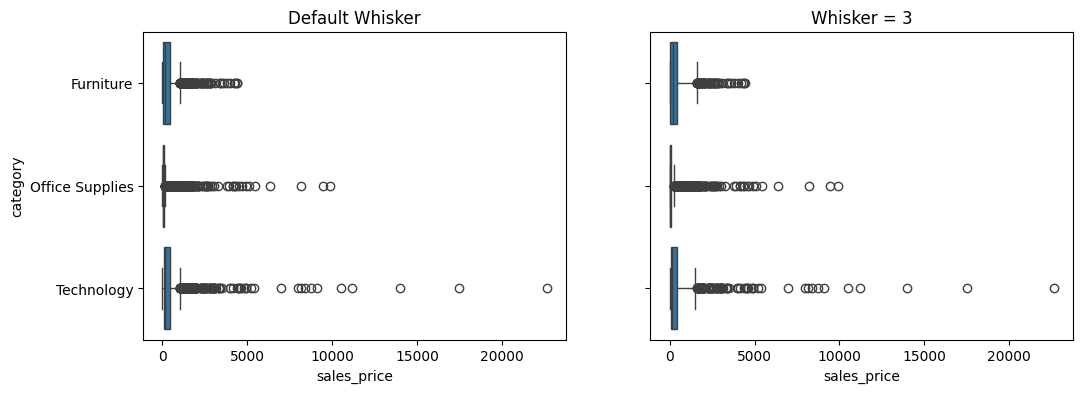

In [75]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.boxplot(data=df, x='sales_price', y='category', ax=axs[0])
sns.boxplot(data=df, x='sales_price', y='category', whis=3, ax=axs[1])
axs[0].set_title("Default Whisker")
axs[1].set_title("Whisker = 3")
plt.show()

In [76]:
def count_outliers(s, whis=1.5):
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, up = q1 - (iqr*whis), q3 + (iqr*whis)
    count = len(s.loc[(s < low) | (s > up)])
    return count

print(count_outliers(df['sales_price']))
print(count_outliers(df['sales_price'], whis=3))

1167
668


In [77]:
def remove_outlier(df, col, whis=1.5):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    low, up = q1 - (iqr*whis), q3 + (iqr*whis)
    df_new = df.loc[(df[col] >= low) & (df[col] <= up)]
    return df_new

print(remove_outlier(df, 'sales_price').shape)
print(remove_outlier(df, 'sales_price', whis=3).shape)

(8826, 28)
(9325, 28)


shape of dataframe after removing the ouliers in 'sales_price' column - (9325, 28)


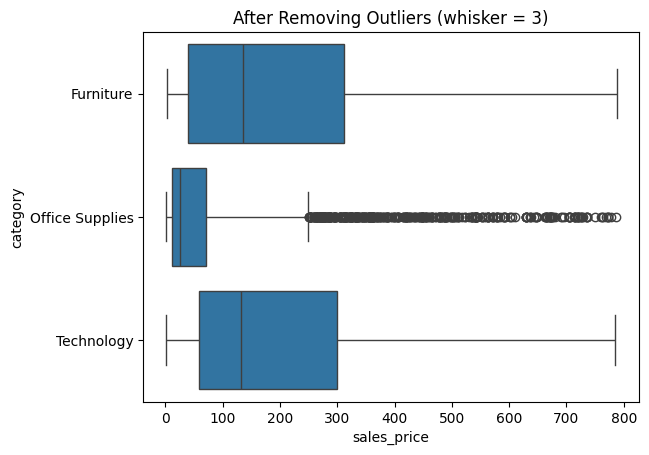

In [78]:
df = remove_outlier(df, 'sales_price', whis=3)
print(f"shape of dataframe after removing the ouliers in 'sales_price' column - {df.shape}")
sns.boxplot(data=df, x='sales_price', y='category', whis=3)
plt.title("After Removing Outliers (whisker = 3)")
plt.show()

#### Profit column
- most of the ouliers will be gone due to removal of outliers in `sales_price` column

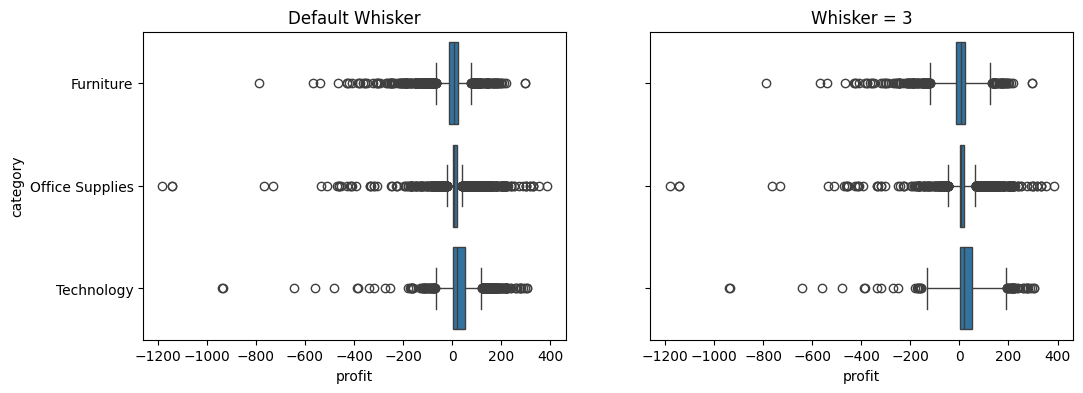

In [79]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.boxplot(data=df, x='profit', y='category', ax=axs[0])
sns.boxplot(data=df, x='profit', y='category', whis=3, ax=axs[1])
axs[0].set_title("Default Whisker")
axs[1].set_title("Whisker = 3")
plt.show()

shape of dataframe after removing the ouliers in 'profit' column - (8455, 28)


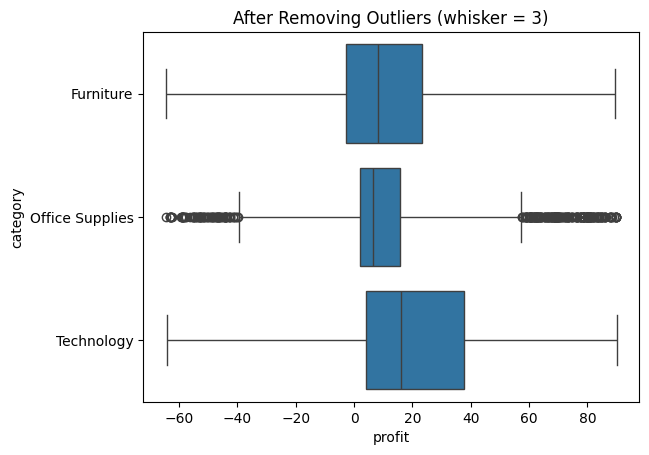

In [80]:
df = remove_outlier(df, 'profit', whis=3)
print(f"shape of dataframe after removing the ouliers in 'profit' column - {df.shape}")
sns.boxplot(data=df, x='profit', y='category', whis=3)
plt.title("After Removing Outliers (whisker = 3)")
plt.show()

## 10. Customer Segmentation and Analysis:
- Calculate Customer Sales Quintile and Customer Profit Quintile based on total sales and total profit per Customer ID.
- What is a Quintile? Quintiles are a statistical way of dividing data into five equal parts, each representing 20% of the data. For example, customers in the top quintile (Q5) represent the top 20% of sales or profit.
- Create a cross-grid (cross-tabulation) based on these two quintiles to analyze the relationship between customer sales and profitability.

In [81]:
sales_stats_per_customer = df.groupby('customer_id')[['total_sales', 'quantity', 'total_discount', 'total_profit']].sum()

print(f' shape of dataframe - {sales_stats_per_customer.shape}')
sales_stats_per_customer.head()

 shape of dataframe - (789, 4)


,total_sales,quantity,total_discount,total_profit
customer_id,,,,
AA-10315,1847.172,22,397.568,226.9427
AA-10375,1734.870,39,188.540,453.0894
AA-10480,2262.666,29,11.664,530.8480
AA-10645,5642.880,49,384.210,827.9515
AB-10015,1984.480,13,18.490,262.7361


In [82]:
customer_sales_quintile = pd.qcut(sales_stats_per_customer['total_sales'], 5, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
customer_profits_quintile = pd.qcut(sales_stats_per_customer['total_profit'], 5, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
print(customer_sales_quintile)
print(customer_profits_quintile)

customer_id
AA-10315    Q2
AA-10375    Q2
AA-10480    Q2
AA-10645    Q4
AB-10015    Q2
            ..
XP-21865    Q5
YC-21895    Q3
YS-21880    Q5
ZC-21910    Q5
ZD-21925    Q1
Name: total_sales, Length: 789, dtype: category
Categories (5, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' < 'Q5']
customer_id
AA-10315    Q2
AA-10375    Q3
AA-10480    Q3
AA-10645    Q4
AB-10015    Q2
            ..
XP-21865    Q5
YC-21895    Q3
YS-21880    Q3
ZC-21910    Q5
ZD-21925    Q2
Name: total_profit, Length: 789, dtype: category
Categories (5, object): ['Q1' < 'Q2' < 'Q3' < 'Q4' < 'Q5']


Crosstabs (contingency tables) are used to analyse relationship between two categorical variables.
It is a type of table in a matrix format that displays the multivariate frequency distribution of the variables.

In [83]:
crosstab = pd.crosstab(customer_sales_quintile, customer_profits_quintile)
crosstab

total_profit,Q1,Q2,Q3,Q4,Q5
total_sales,,,,,
Q1,83,58,17,0,0
Q2,37,46,50,25,0
Q3,16,29,41,53,18
Q4,15,16,34,41,52
Q5,7,9,15,39,88


- each cell represents the **number of customers** who fall into that (sales quintile, profit quintile) combination
- top-left cell indicates that there are *83 customers* who contributed least to both - sales and profits for our shop
- and there are *88 customers* (bottom-right) that contributed in both high sales and high profits for our shop
- there are *7 customers* (bottom-left) that bought a lot from the shop but did not contribute that much in profits

## 11. Final Analysis and Dashboard Creation:

In [84]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount,shipping_urgency,days_since_last_order
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,3,C G,261.96,523.920,83.8272,0.000,0.000,Urgent,390
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,4,D H,14.62,29.240,13.7428,0.000,0.000,Standard,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,7,S O,27.96,44.736,5.0328,5.592,11.184,Standard,0
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,5,B H,48.86,342.020,99.1858,0.000,0.000,Standard,0
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,5,B H,7.28,29.120,7.8624,0.000,0.000,Standard,0


### 1. Sales and Profit Analysis:
- Top 10 Most Profitable Products: Use a bar chart to display the products with the highest total profit.
- Top 10 Most Loss-Making Products: Use a bar chart to display the products with the highest total losses (negative profit).
- Sales vs. Profit Correlation: Use a scatter plot to visualize the correlation between Total Sales and Total Profit. Add a regression line to show the trend.
- Joint Distribution of Sales and Profit: Create a joint plot to analyze the relationship between Total Sales and Total Profit across different products.

In [85]:
profit_per_product = df.groupby('product_id').agg({
    'total_sales': 'sum',
    'total_profit': 'sum',
    'category': 'first',
    'sub_category': 'first',
    'product_name': 'first'
})
profit_per_product.sort_values('total_profit')

,total_sales,total_profit,category,sub_category,product_name
product_id,,,,,
OFF-BI-10002429,1159.764,-850.4936,Office Supplies,Binders,"Premier Elliptical Ring Binder, Black"
FUR-CH-10003396,5804.292,-704.3670,Furniture,Chairs,Global Deluxe Steno Chair
OFF-ST-10004804,4962.672,-694.4652,Office Supplies,Storage,"Belkin 19"" Vented Equipment Shelf, Black"
OFF-BI-10000474,956.991,-660.1154,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...
OFF-BI-10001098,897.960,-574.0530,Office Supplies,Binders,Acco D-Ring Binder w/DublLock
...,...,...,...,...,...
OFF-AR-10000380,6828.804,1936.9800,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue"
OFF-PA-10001125,5960.552,2092.6990,Office Supplies,Paper,Xerox 1988
OFF-LA-10002762,4949.350,2326.1945,Office Supplies,Labels,Avery 485


#### Top 10 Most Profitable Products

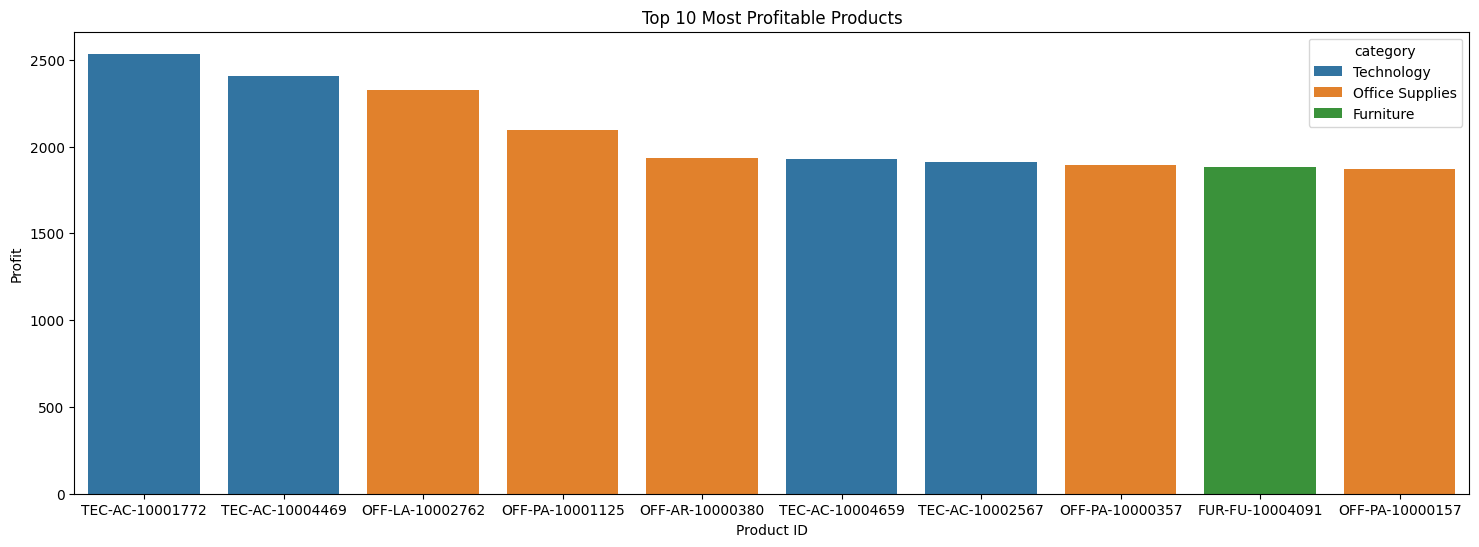

In [86]:
top10 = profit_per_product.sort_values(['total_profit'], axis='index', ascending=False).head(10)

plt.figure(figsize=(18, 6))
sns.barplot(data=top10, y='total_profit', x='product_id', hue='category')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Product ID")
plt.ylabel("Profit")
plt.show()

#### Top 10 Loss-Making Products

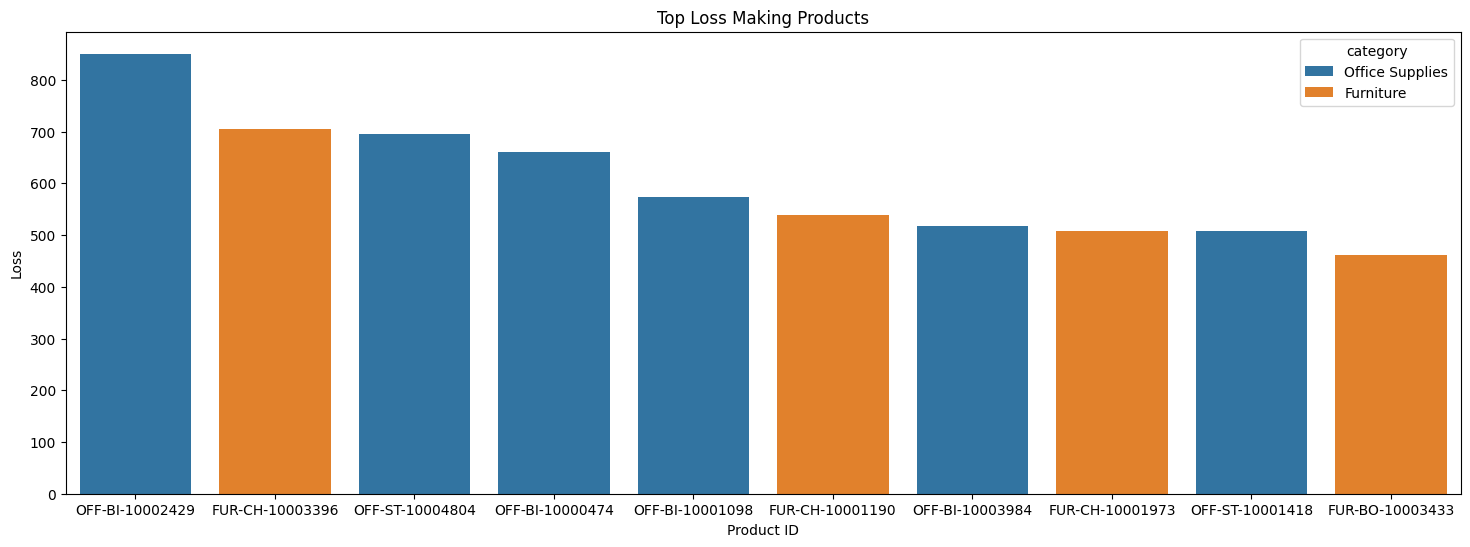

In [87]:
last10 = profit_per_product.sort_values(['total_profit'], axis='index', ascending=True).head(10)
# converting all profits to loss (now a +ve value means loss and -ve value means profit)
last10['total_profit'] = last10['total_profit'] - (2*last10['total_profit'])

plt.figure(figsize=(18, 6))
sns.barplot(data=last10, y='total_profit', x='product_id', hue='category')
plt.title("Top Loss Making Products")
plt.xlabel("Product ID")
plt.ylabel("Loss")
plt.show()

#### Correlation between Total sale of and Total profit from a product

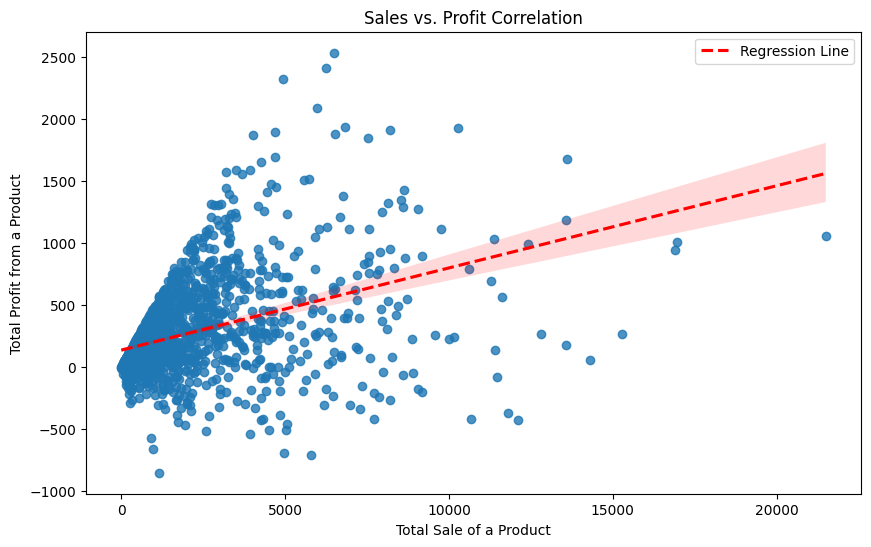

In [88]:
plt.figure(figsize=(10, 6))
sns.regplot(data=profit_per_product, x='total_sales', y='total_profit', line_kws={'color': 'red', 'linestyle': '--', 'label': 'Regression Line'})
plt.title("Sales vs. Profit Correlation")
plt.xlabel("Total Sale of a Product")
plt.ylabel("Total Profit from a Product")
plt.legend()
plt.show()

In [89]:
print(profit_per_product[['total_sales', 'total_profit']].corr())

              total_sales  total_profit
total_sales      1.000000      0.418484
total_profit     0.418484      1.000000


Thus, we can say that the 'total sale of a product' is <ins>moderately correlated</ins> to the 'total profit from that product'

#### Joint Plot between Total Sales and Total Profit across different products
Joint plot is a combination of scatter plot between two variables and their individual histograms

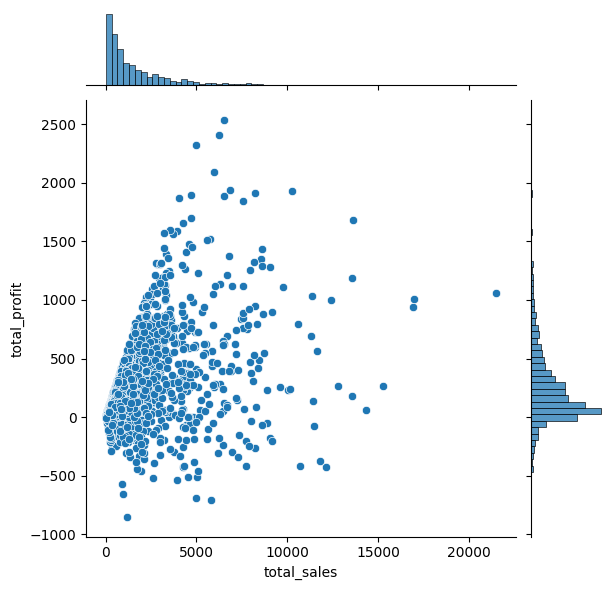

In [90]:
# plt.figure(figsize=(15, 9))
sns.jointplot(data=profit_per_product, x='total_sales', y='total_profit')
# plt.title("Joint Distribution of Sales and Profit")
# plt.xlabel("Total Sale of a Product")
# plt.ylabel("Total Profit from a Product")
plt.show()

### 2. Customer Segmentation and Analysis:
- Customer Sales Quintile vs. Customer Profit Quintile: Create a heatmap or cross-tabulation to explore the relationship between customers' sales and profit quintiles. This will help identify which segments of customers are most valuable.
- Understand how different product categories perform across customer segments: Create a pivot table to analyze the total Sales and total Profit by Category and Segment. Sort the pivot table to highlight the most profitable and least profitable combinations of Category and Segment.

#### Customers' sales and profit quintiles - Heatmap

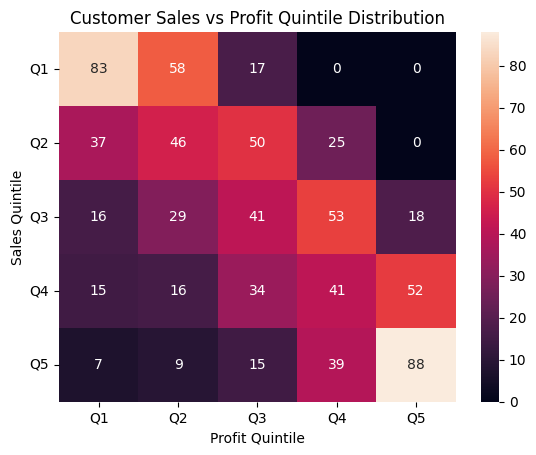

In [91]:
sns.heatmap(crosstab, annot=True)
plt.title('Customer Sales vs Profit Quintile Distribution')
plt.xlabel('Profit Quintile')
plt.ylabel('Sales Quintile')
plt.yticks(rotation=0)
plt.show()

#### Pivot table to analyze the <ins>total sales</ins>, <ins>total profit</ins> and <ins># of orders</ins> by Category and Segment

In [92]:
pvt_table = pd.pivot_table(
    df, 
    values=['sales_price', 'profit', 'order_id'], 
    index=['segment'], 
    columns=['category'], 
    aggfunc={'sales_price':'sum', 'profit':'sum', 'order_id':'count'}
)
pvt_table

order_id                                profit                  \
category    Furniture Office Supplies Technology  Furniture Office Supplies   
segment                                                                       
Consumer          837            2884        717  9164.0480      30534.2016   
Corporate         474            1643        408  5147.4720      17347.5420   
Home Office       267             982        243  2879.8456      11206.9739   

                         sales_price                              
category     Technology    Furniture Office Supplies  Technology  
segment                                                           
Consumer     15839.4634  141586.8001      155948.662  116009.540  
Corporate     8405.3845   76024.2283       91376.752   59340.632  
Home Office   5480.8071   39299.0106       52821.594   38478.591

- 'Consumer' segment brings in the most total sale as well as profits!
- The <mark>'Consumer'x'Office Supplies'</mark> combination <mark>leads in all three criterias</mark> of total # orders, total amount of sale and total profits
- The <mark>poorest performance in the three criterias</mark> of total # orders, total amount of sale and total profits is seen from the <mark>'Home Office'x'Furniture'</mark> combination

- Profit margins can also be calculated from the above pivot table

In [93]:
profit_margins = pvt_table['profit'] / pvt_table['sales_price']
profit_margins

category,Furniture,Office Supplies,Technology
segment,,,
Consumer,0.064724,0.195796,0.136536
Corporate,0.067708,0.189846,0.141646
Home Office,0.073280,0.212167,0.142438


- From the above profit margins, we can say that, the combination <mark>'Home Office'x'Office Supplies'</mark> is the most profitable business unit of our shop

### 3. Shipping and Delivery Analysis:
- Distribution of Shipping Urgency: Visualize the distribution of orders by Shipping Urgency using a pie chart or bar chart.
- Days to Ship vs. Profit: Use a violin plot to explore the distribution of Profit across different Days to Ship categories. This will help analyze whether faster shipping correlates with higher or lower profitability.
- Shipping Mode and Profitability: Create a grouped bar chart to compare the profitability of different shipping modes (e.g., Standard Class, First Class).
- Using a pivot table, determine which shipping modes are most preferred across different regions and analyze the impact on total sales and profit. Create a pivot table that shows the count of Order IDs, total Sales, and total Profit for each Region and Ship Mode. Identify and print your insights. 

#### Distribution of Orders by Shipping Urgency - Pie Chart 

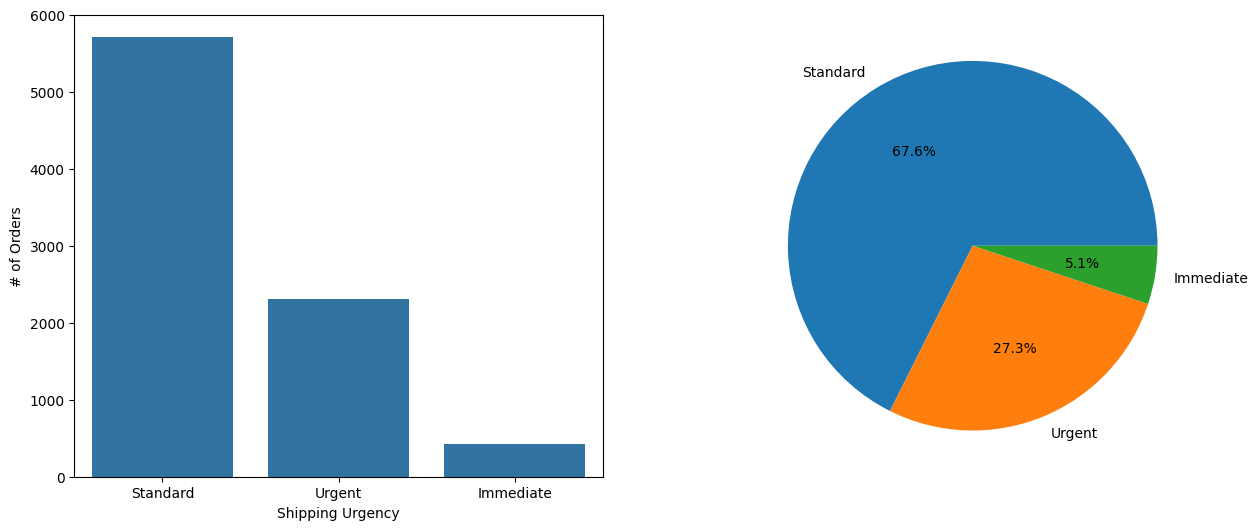

In [94]:
shipping_urgency_freq = pd.DataFrame(df['shipping_urgency'].value_counts()).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=shipping_urgency_freq, x='shipping_urgency', y='count', ax=axs[0])
axs[0].set_xlabel('Shipping Urgency')
axs[0].set_ylabel('# of Orders')
axs[1].pie(shipping_urgency_freq['count'], labels=shipping_urgency_freq['shipping_urgency'], autopct='%1.1f%%')
plt.show()

#### Profit Distribution across different Days to Ship categories - Violin Plot

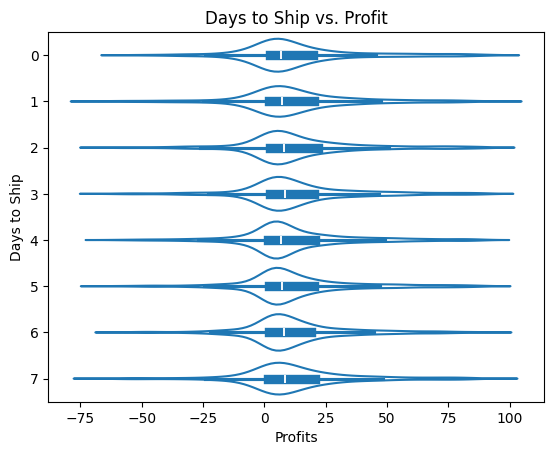

In [95]:
sns.violinplot(data=df, x='profit', y='days_to_ship', orient='h', fill=False)
plt.title("Days to Ship vs. Profit")
plt.xlabel("Profits")
plt.ylabel("Days to Ship")
plt.show()

- This 'Days to Ship vs. Profit' violin plot shows that there is no relation between the speed of shipping of orders and profit earned on those orders

#### Profit Distribution across different Shipping Modes - Bar Plot

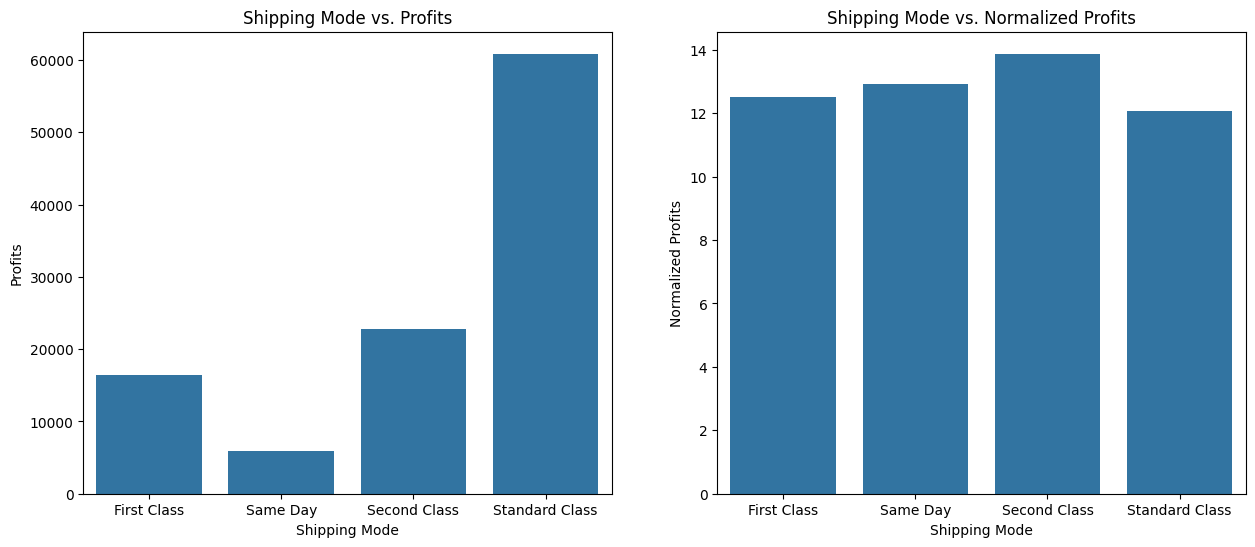

In [96]:
grouped_ship_mode = df.groupby('ship_mode').agg({'order_id':'count', 'profit':'sum'})
grouped_ship_mode['normalized_profits'] = grouped_ship_mode['profit'] / grouped_ship_mode['order_id']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=grouped_ship_mode, y='profit', x='ship_mode', ax=axs[0])
sns.barplot(data=grouped_ship_mode, y='normalized_profits', x='ship_mode', ax=axs[1])
axs[0].set_title("Shipping Mode vs. Profits")
axs[1].set_title("Shipping Mode vs. Normalized Profits")
axs[0].set_xlabel('Shipping Mode')
axs[1].set_xlabel('Shipping Mode')
axs[0].set_ylabel('Profits')
axs[1].set_ylabel('Normalized Profits')
plt.show()

- The 'Standard Class' shipping mode forms the highest total profits
- But the 'Second Class' shipping mode brings in the highest profit **per order**

#### Pivot table to analyze the <ins>total sales</ins>, <ins>total profit</ins> and <ins># of orders</ins> by Region and Shipping Mode

In [97]:
pvt_table_2 = pd.pivot_table(
    df, 
    values=['profit', 'sales_price', 'order_id'], 
    index='region',
    columns='ship_mode',
    aggfunc={'profit':'sum', 'sales_price':'sum', 'order_id':'count'}
)
pvt_table_2

order_id                                           profit  \
ship_mode First Class Same Day Second Class Standard Class First Class   
region                                                                   
Central           256      100          384           1184   1954.4859   
East              409      121          440           1394   4780.7963   
South             201       69          276            830   2927.3720   
West              452      164          543           1632   6814.1403   

                                                 sales_price             \
ship_mode   Same Day Second Class Standard Class First Class   Same Day   
region                                                                    
Central     806.6475    3741.5052      9085.0880  22947.3382   8070.426   
East       1650.3857    5222.1100     16532.7621  31982.0070  10262.664   
South       966.5039    4460.9114     10510.0887  18996.5460   5801.535   
West       2438.3193    9367.3942     24747.2276  48970.7545  16770.382   

                                       
ship_mode Second Class Standard Class  
region                                 
Central     33354.5394     97724.7714  
East        36860.8080    112614.5970  
South       26534.9320     72535.9910  
West        58666.9445    168791.5740

### 4. Regional Sales and Profitability:
- Sales and Profit by Region: Use a map or bar chart to visualize total sales and profit by region or state. This will highlight which regions are the most profitable.
- State-wise Profitability: Create a pivot table to summarize the profitability of each state. Highlight the top and bottom states based on profitability.
- Correlation between State and Profit: Use a correlation plot to identify any patterns or relationships between the states and the profitability of orders.  
  (Hint: Convert the categorical 'State' column into numerical values using label encoding using “from sklearn.preprocessing import LabelEncoder”)

#### Sales and Profit by Region - Bar *(for sales)* & Line *(for profits)* plot

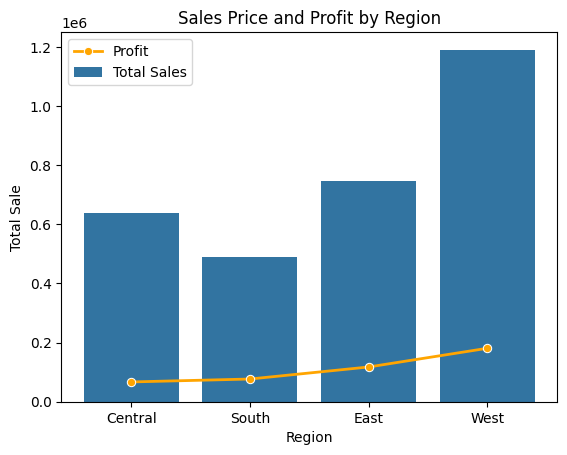

In [98]:
grouped_region = df.groupby('region').agg({'total_sales':'sum', 'total_profit':'sum'}).reset_index().sort_values(by='total_profit')

sns.barplot(data=grouped_region, x='region', y='total_sales', label='Total Sales')
sns.lineplot(data=grouped_region, x='region', y='total_profit', color='orange', marker='o', linewidth=2, label='Profit')
plt.xlabel('Region')
plt.ylabel('Total Sale')
plt.title("Sales Price and Profit by Region")
plt.show()

#### Pivot Table to summarize the Profitability Across States

In [99]:
pvt_table_state_profit = pd.pivot_table(df, index='state', values='profit', aggfunc='sum').sort_values(by='profit')

top5_most_profitable = pvt_table_state_profit.iloc[:-6:-1]
last5_least_profitable = pvt_table_state_profit.head(5)

print(f'Top 5 States by Profit: \n\n{top5_most_profitable}\n')
print('=========================')
print(f'\nBottom 5 States by Profit: \n\n{last5_least_profitable}')

Top 5 States by Profit: 

                profit
state                 
California  30447.1659
New York    16891.3635
Washington   7930.6299
Michigan     5103.1421
Virginia     4178.5846


Bottom 5 States by Profit: 

                 profit
state                  
Illinois      -186.8631
Pennsylvania  -128.5627
West Virginia   43.4336
North Dakota    68.0549
Ohio            89.0117


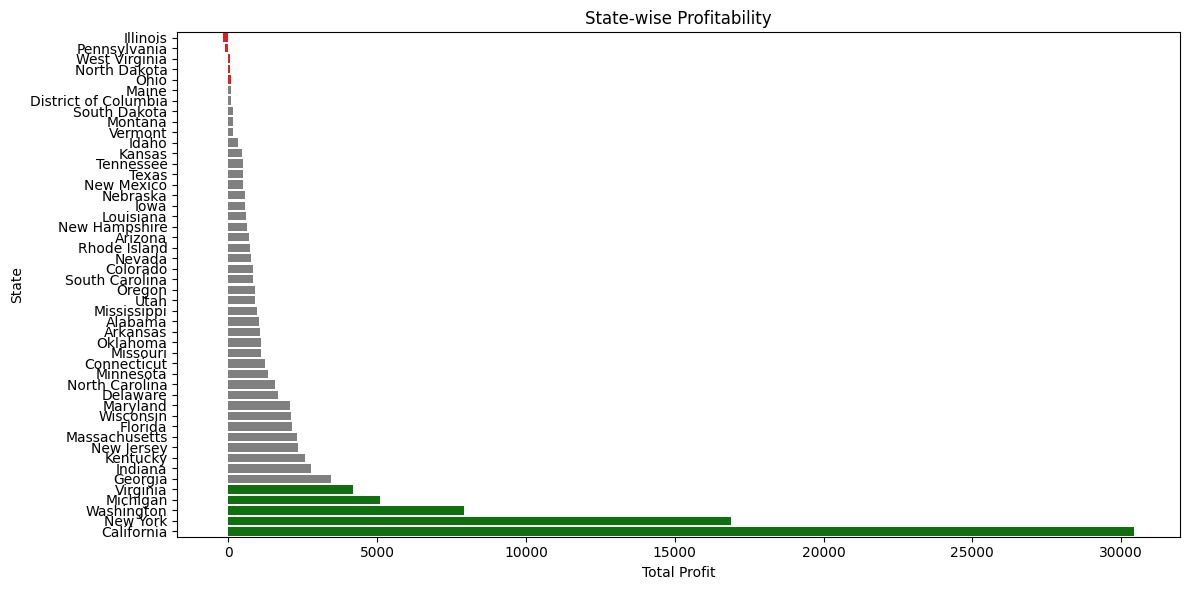

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=pvt_table_state_profit['profit'], 
    y=pvt_table_state_profit.index, 
    hue=pvt_table_state_profit.index, 
    palette=['red' if i in last5_least_profitable.index else 'green' if i in top5_most_profitable.index else 'gray' for i in pvt_table_state_profit.index]
)
plt.title("State-wise Profitability")
plt.xlabel("Total Profit")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#### Correlation between State and Profit

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_state_profit = pvt_table_state_profit.reset_index()
df_state_profit['state_encoded'] = le.fit_transform(df_state_profit['state'])
print(df_state_profit.head())

print('\n=================================================\n')

corr_matrix = df_state_profit[['state_encoded', 'profit']].corr()
print(corr_matrix)

           state    profit  state_encoded
0       Illinois -186.8631             11
1   Pennsylvania -128.5627             36
2  West Virginia   43.4336             46
3   North Dakota   68.0549             32
4           Ohio   89.0117             33


               state_encoded    profit
state_encoded       1.000000 -0.130992
profit             -0.130992  1.000000


- Every variable is perfectly correlated with itself (values are 1 on the \ diagonal)
- The value of -0.13 on the / diagonal is the correlation between state (label-encoded numbers) and profit. Correlation is weakly negative, which means that there is <ins>no meaningful linear relationship between state and profit</ins>. **<mark>But this meaning is not correct.</mark>**
- Correlation between state and profit depends on the assignment of numbers to states. If their is a assignment of numbers different from the current ones, then there would be a different correlation value between state and profit.
- Consider the below example -

In [102]:
# labeling the states according to their profits. Least profitable state is labeled 1
df_state_profit['state_encoded'] = np.arange(1, len(df_state_profit)+1)
print(df_state_profit.head())
print('\n=================================================\n')
corr_matrix = df_state_profit[['state_encoded', 'profit']].corr()
print(corr_matrix)

           state    profit  state_encoded
0       Illinois -186.8631              1
1   Pennsylvania -128.5627              2
2  West Virginia   43.4336              3
3   North Dakota   68.0549              4
4           Ohio   89.0117              5


               state_encoded    profit
state_encoded       1.000000  0.544156
profit              0.544156  1.000000


### 5. Discount and Pricing Analysis:
- Impact of Discounts on Profitability: Use a scatter plot with a trend line to analyze how different levels of discount affect profitability.
- Original Price vs. Discounted Price: Create a line plot to compare the original price and the discounted price across various product categories or sub-categories.

#### Impact of Discounts on Profitability: Scatter Plot along with a Trend Line

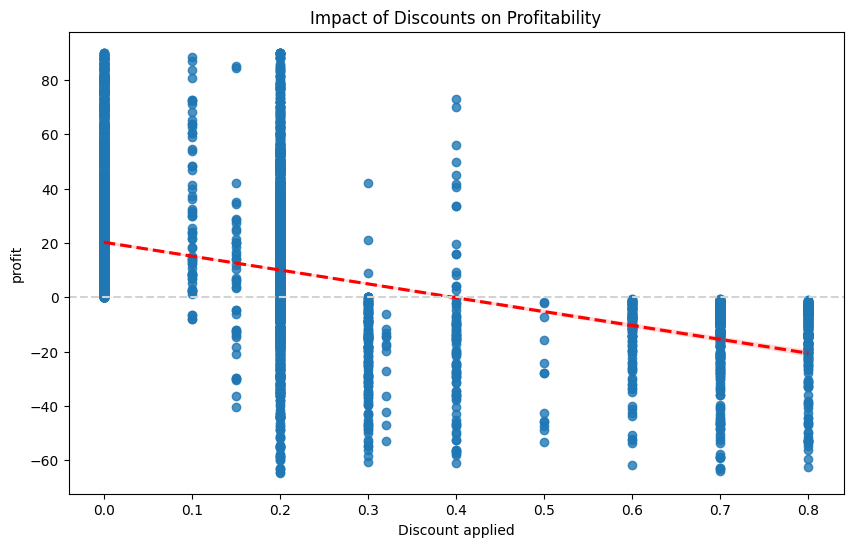

In [103]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='discount', y='profit', line_kws={'color': 'red', 'linestyle': '--', 'label': 'Regression Line'})
plt.axhline(y=0, color='lightgray', linestyle='--')
plt.title("Impact of Discounts on Profitability")
plt.xlabel("Discount applied")
plt.ylabel("profit")
plt.show()

#### Original Price vs. Discounted Price: Combined Line plot

In [104]:
grouped_category = df.groupby('category')[['original_price', 'sales_price']].sum()
grouped_sub_category = df.groupby('sub_category').agg({
    'original_price':'sum',
    'sales_price':'sum',
    'category':'first'
})
print(grouped_category.head())
print('\n=============================================================\n')
print(grouped_sub_category.head())

                 original_price  sales_price
category                                    
Furniture             311508.25   256910.039
Office Supplies       351016.62   300147.008
Technology            257008.45   213828.763


              original_price  sales_price         category
sub_category                                              
Accessories         84425.03    75831.246       Technology
Appliances          40287.32    35380.695  Office Supplies
Art                 27058.26    25060.478  Office Supplies
Binders             69463.31    42962.151  Office Supplies
Bookcases           48791.58    41169.370        Furniture


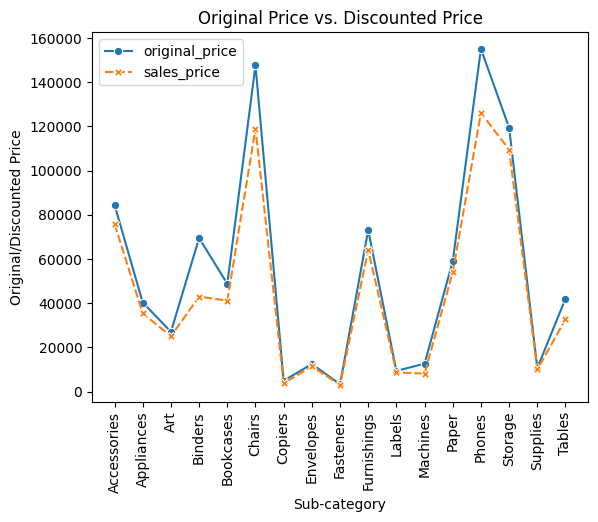

In [105]:
sns.lineplot(data=grouped_sub_category, markers=True)
plt.xticks(rotation=90)
plt.title("Original Price vs. Discounted Price")
plt.ylabel("Original/Discounted Price")
plt.xlabel("Sub-category")
plt.show()

### 6. Temporal Analysis:
- Sales and Profit Trends Over Time: Use a time series plot to analyze how sales and profit have trended over the years or months. This will help in identifying any seasonal patterns.
- Order Frequency by Month: Use a bar chart or line plot to show the number of orders placed each month. Highlight any months with unusually high or low order frequencies.
- Yearly Growth in Sales and Profit: Use a year-over-year growth chart to compare the sales and profit growth over different years.

In [106]:
df_orderdate_idx = df[['order_date', 'order_id', 'total_sales', 'total_profit', 'discount', ]].set_index('order_date')
df_orderdate_idx.index = pd.to_datetime(df_orderdate_idx.index)
df_orderdate_idx.head()

,order_id,total_sales,total_profit,discount
order_date,,,,
2016-11-08,CA-2016-152156,523.920,83.8272,0.0
2016-06-12,CA-2016-138688,29.240,13.7428,0.0
2015-10-11,US-2015-108966,44.736,5.0328,0.2
2014-06-09,CA-2014-115812,342.020,99.1858,0.0
2014-06-09,CA-2014-115812,29.120,7.8624,0.0


In [107]:
print(df_orderdate_idx.index.min())
print(df_orderdate_idx.index.max())

2014-01-03 00:00:00
2017-12-31 00:00:00


In [108]:
monthly_sales_and_profit = df_orderdate_idx[['order_id', 'total_sales', 'total_profit']].resample('ME').agg({
    'order_id': 'count',
    'total_sales': 'sum',
    'total_profit': 'sum'
})
monthly_sales_and_profit.head()

,order_id,total_sales,total_profit
order_date,,,
2014-01-31,68,24222.543,1973.0401
2014-02-28,43,8549.138,1734.5782
2014-03-31,135,48004.486,5923.5022
2014-04-30,113,37100.387,6343.6774
2014-05-31,103,32645.859,5063.8485


#### Sales and Profit Trends Over Time - Line Plot

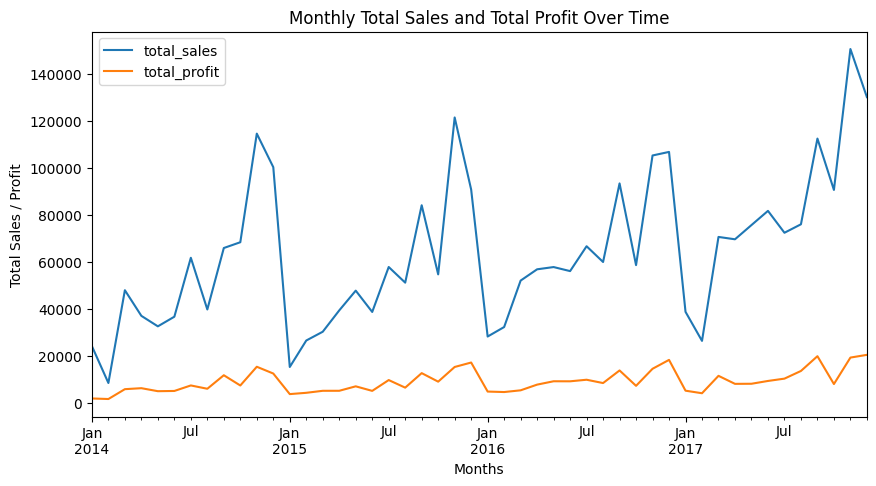

In [109]:
ax = monthly_sales_and_profit[['total_sales', 'total_profit']].plot(figsize=(10, 5))
ax.set_title('Monthly Total Sales and Total Profit Over Time')
ax.set_xlabel('Months')
ax.set_ylabel('Total Sales / Profit')
plt.show()

#### Order Frequency by Month - To Find Months with Unusual Sales

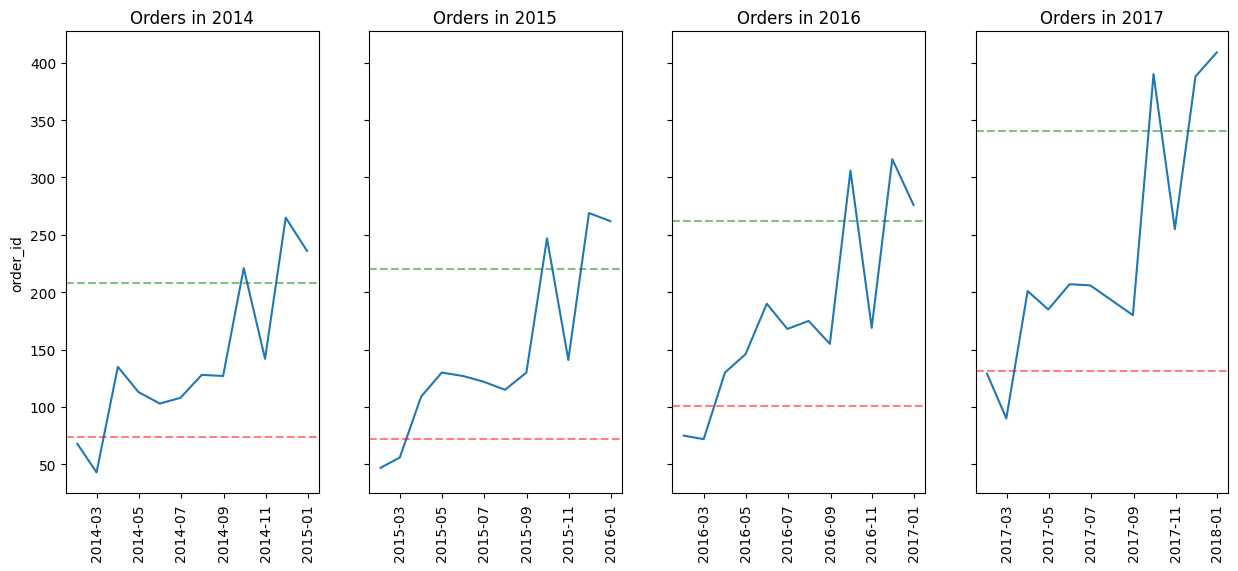

In [110]:
# we'll declare the number of montly orders as unusual if they are more than one std deviations away from the mean

fig, ax = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

filters = [
    (monthly_sales_and_profit.index < '2015-01-01'),
    (monthly_sales_and_profit.index > '2014-12-31') & (monthly_sales_and_profit.index < '2016-01-01'),
    (monthly_sales_and_profit.index > '2015-12-31') & (monthly_sales_and_profit.index < '2017-01-01'),
    (monthly_sales_and_profit.index > '2016-12-31')
]

for i, year in enumerate(['2014', '2015', '2016', '2017']):
    sns.lineplot(monthly_sales_and_profit.loc[filters[i], 'order_id'], ax=ax[i])
    
    avg_montly_order_frequency = monthly_sales_and_profit.loc[filters[i], 'order_id'].mean()
    sigma_montly_order_frequency = monthly_sales_and_profit.loc[filters[i], 'order_id'].std()
    high = avg_montly_order_frequency + sigma_montly_order_frequency
    low = avg_montly_order_frequency - sigma_montly_order_frequency
    ax[i].axhline(high, color='green', linestyle='--', alpha=0.5)
    ax[i].axhline(low, color='red', linestyle='--', alpha=0.5)
    
    ax[i].set_title(f'Orders in {year}')
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_xlabel('')

plt.show()

- Thus it can be seen that
  - the months of January, February consistently over the years, record unusually low orders
  - the months of October, November and December consistently over the years, record unusually high orders

In [111]:
yearly_sales_and_profit = df_orderdate_idx[['total_sales', 'total_profit']].resample('YE').sum()
yearly_sales_and_profit

,total_sales,total_profit
order_date,,
2014-12-31,638170.9846,87175.5775
2015-12-31,658615.5717,101855.9203
2016-12-31,774576.7131,114121.6312
2017-12-31,995381.9776,138901.1925


#### Yearly Sales and Profit

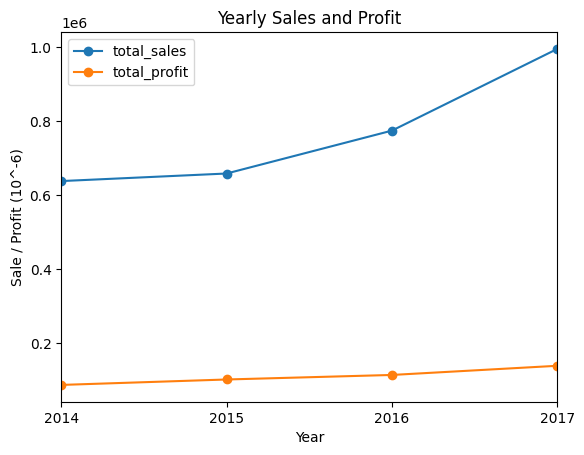

In [112]:
ax = yearly_sales_and_profit.plot(style='o-')
ax.set_title("Yearly Sales and Profit")
ax.set_xlabel("Year")
ax.set_ylabel("Sale / Profit (10^-6)")
plt.show()

In [113]:
df.to_csv('./clean_dataset.csv')